<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.870655,47.464584,70.831962,0.004940,170.172141,170.163311,0.008830
1,0.0,1.0,93.887116,68.110194,59.500066,-0.030868,231.466508,231.505718,-0.039210
2,0.0,2.0,39.968307,70.347859,37.658251,-0.011485,157.962932,157.971860,-0.008928
3,0.0,3.0,43.295552,93.138613,43.824704,-0.022550,190.236319,190.260238,-0.023919
4,0.0,4.0,79.649399,21.699784,49.663256,-0.057190,160.955248,161.011471,-0.056223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.032024,67.812831,59.198901,0.008049,200.051805,200.043647,0.008158
119996,999.0,116.0,65.574803,37.737817,82.520111,-0.017869,195.814862,195.822328,-0.007466
119997,999.0,117.0,89.150008,68.887959,64.149811,0.010152,232.197930,232.186612,0.011318
119998,999.0,118.0,27.733784,76.989367,50.147853,0.013915,164.884919,164.874911,0.010008


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.870655,47.464584,70.831962,0.004940,170.172141,170.163311,0.008830
1,0.0,1.0,93.887116,68.110194,59.500066,-0.030868,231.466508,231.505718,-0.039210
2,0.0,2.0,39.968307,70.347859,37.658251,-0.011485,157.962932,157.971860,-0.008928
3,0.0,3.0,43.295552,93.138613,43.824704,-0.022550,190.236319,190.260238,-0.023919
4,0.0,4.0,79.649399,21.699784,49.663256,-0.057190,160.955248,161.011471,-0.056223
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,63.032024,67.812831,59.198901,0.008049,200.051805,200.043647,0.008158
119996,999.0,116.0,65.574803,37.737817,82.520111,-0.017869,195.814862,195.822328,-0.007466
119997,999.0,117.0,89.150008,68.887959,64.149811,0.010152,232.197930,232.186612,0.011318
119998,999.0,118.0,27.733784,76.989367,50.147853,0.013915,164.884919,164.874911,0.010008


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    41.870655  47.464584  70.831962  ...  170.172141  170.163311  0.008830
      1.0    93.887116  68.110194  59.500066  ...  231.466508  231.505718 -0.039210
      2.0    39.968307  70.347859  37.658251  ...  157.962932  157.971860 -0.008928
      3.0    43.295552  93.138613  43.824704  ...  190.236319  190.260238 -0.023919
      4.0    79.649399  21.699784  49.663256  ...  160.955248  161.011471 -0.056223
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  63.032024  67.812831  59.198901  ...  200.051805  200.043647  0.008158
      116.0  65.574803  37.737817  82.520111  ...  195.814862  195.822328 -0.007466
      117.0  89.150008  68.887959  64.149811  ...  232.197930  232.186612  0.011318
      118.0  27.733784  76.989367  50.147853  ...  164.884919  164.874911  0.010008
      119.0  37.182239  70.271314  88.510508  ...  205.969563  205.959687  0.009877

[120000 rows x 7 columns]

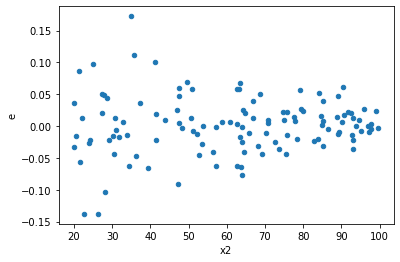

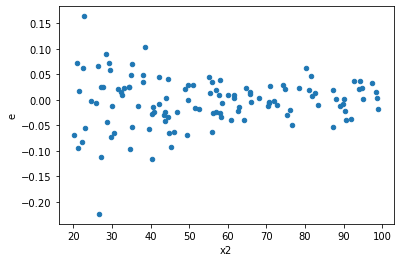

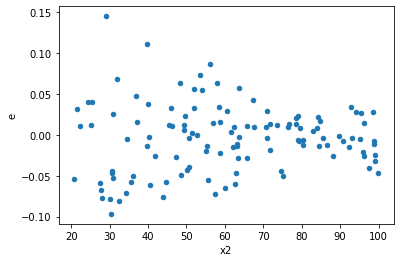

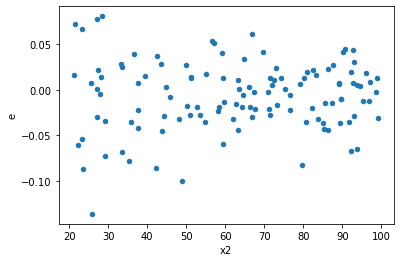

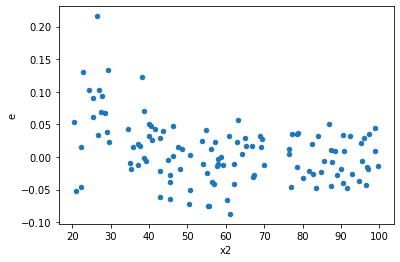

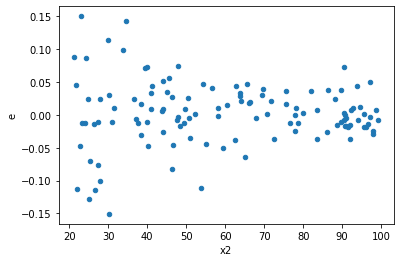

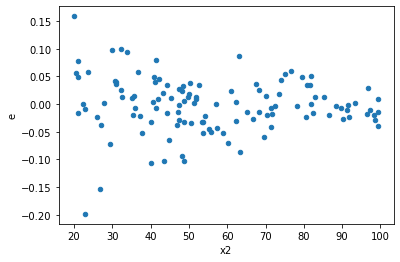

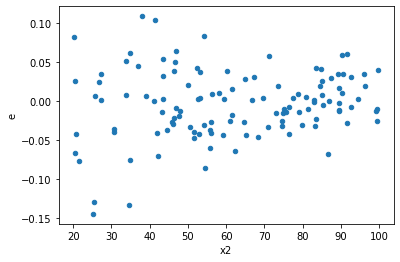

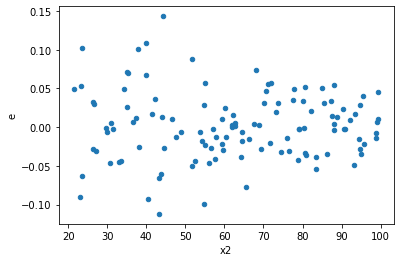

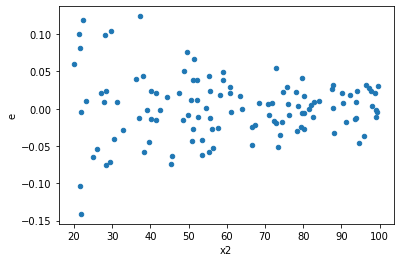

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,45.0,69.0,0.07794299638278271,0.1942362294892556,0.0017714317359723343,0.0028564151395478765,1.6252364897380445,0.08406324213759131,0.9579683789312043,Reject001=1 : Homoscedasticity
2.0,57.0,57.0,0.09241401223350083,0.10513881224264814,0.001650250218455372,0.0018774787900472881,1.137693404945949,0.627905526662788,0.686047236668606,Reject001=1 : Homoscedasticity
5.0,53.0,61.0,0.03703730471680555,0.23844480917079325,0.0007122558599385683,0.0039740801528465545,5.593640260052027,1.927553894276457e-09,0.999999999036223,Reject001=0 : Heteroscedasticity
7.0,57.0,57.0,0.042580988938650643,0.17040654744527686,0.0007603748024759044,0.003042974061522801,4.001939637681813,5.059677463670198e-07,0.9999997470161268,Reject001=0 : Heteroscedasticity
8.0,57.0,57.0,0.0967751579763264,0.1275593450534434,0.0017281278210058285,0.002277845447382918,1.3181000963557983,0.30001478346731436,0.8499926082663428,Reject001=1 : Homoscedasticity
12.0,59.0,55.0,0.04942093765933648,0.25696855700011084,0.0008520851320575255,0.004758676981483534,5.577740779171865,6.752107761798243e-10,0.9999999996623946,Reject001=0 : Heteroscedasticity
15.0,53.0,61.0,0.09693565493226178,0.19353032378901594,0.0018641472102358034,0.003225505396483599,1.7346485958734927,0.042033582816970005,0.978983208591515,Reject001=1 : Homoscedasticity
16.0,55.0,59.0,0.08877016479116227,0.1187803825884794,0.001643891940577079,0.0020479376308358515,1.247350115377604,0.4092800792664095,0.7953599603667952,Reject001=1 : Homoscedasticity
18.0,47.0,67.0,0.026765589903859414,0.1714334012961275,0.0005818606500839002,0.002597475777214053,4.493054406327576,3.105435240069454e-07,0.999999844728238,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,50.0,64.0,0.1808375783821161,0.05645928688667297,0.003690562824124818,0.000896179156931317,0.24391400435041102,1.834571260048228e-07,Reject001=0 : Heteroscedasticity
1.0,45.0,69.0,0.07794299638278271,0.1942362294892556,0.0017714317359723343,0.0028564151395478765,1.6252364897380445,0.08406324213759131,Reject001=1 : Homoscedasticity
2.0,57.0,57.0,0.09241401223350083,0.10513881224264814,0.001650250218455372,0.0018774787900472881,1.137693404945949,1.372094473337212,Reject001=1 : Homoscedasticity
3.0,57.0,57.0,0.08959379568907143,0.0711975003117106,0.0015998892087334183,0.0012713839341376894,0.7946699853949285,0.38822387910075273,Reject001=1 : Homoscedasticity
4.0,54.0,60.0,0.16227833083347748,0.06790702072630084,0.0030618552987448583,0.0011509664529881498,0.37661416863096464,0.0002828705315308949,Reject001=0 : Heteroscedasticity
5.0,53.0,61.0,0.03703730471680555,0.23844480917079325,0.0007122558599385683,0.0039740801528465545,5.593640260052027,1.927553894276457e-09,Reject001=0 : Heteroscedasticity
6.0,55.0,59.0,0.151723263197606,0.13141578888988736,0.002809690059214926,0.002265789463618748,0.8074321715638955,0.41980497926944854,Reject001=1 : Homoscedasticity
7.0,57.0,57.0,0.042580988938650643,0.17040654744527686,0.0007603748024759044,0.003042974061522801,4.001939637681813,5.059677463670198e-07,Reject001=0 : Heteroscedasticity
8.0,57.0,57.0,0.0967751579763264,0.1275593450534434,0.0017281278210058285,0.002277845447382918,1.3181000963557983,0.30001478346731436,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      578
Reject001=0 : Heteroscedasticity    422
Name: Result_test, dtype: int64